In [45]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
def Rosenbrock(x):
    y = 0
    for i in range(x.shape[0]-1):
        y+=((1-x[i])**2)+100*((x[i+1]-(x[i]**2))**2)
    return y

In [48]:
def heavy_ball(f,grad,x0,eps=10**(-4),N = 10000,alpha = 0.01,beta = 0.1):
    x_cur = np.asarray(x0)
    x_prev = np.asarray(x0)
    M = 0
    f_values = []
    grads = []
    points = []
    for i in range(N):
        points.append(x_cur)
        grads.append(grad(x_cur))
        f_values.append(f(x_cur))
        x_new = x_cur - alpha*grad(x_cur)+beta*(x_cur - x_prev)
        M+=1
            
        if np.linalg.norm(grad(x_new))<eps:   
            break
        x_prev = x_cur
        x_cur = x_new
    points.append(x_cur)
    return x_cur,M,grads, points,f_values





In [49]:
def grad_rosenbrock(x):
    y = np.zeros_like(x)
    y[0] = -2*(1-x[0]) - 400*(x[1] - x[0]**2)*x[0]
    for i in range(1, x.shape[0] - 1):
        y[i] = -2*(1-x[i])+200*(x[i]-x[i-1]**2)-400*(-x[i]**2+x[i+1])*x[i]
    y[-1] = 200*(x[-1]-x[-2]**2)
    return y

In [50]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.8
N = 10000

In [61]:
x, m, grads, points,f_values = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0018,beta = beta,N=N)
def get_graph(x, m, grads, points,f_values):
    x_last = np.linspace(300,m,m-300).reshape(-1,1)
    log_norms = np.log(np.sqrt(np.sum(np.array(grads[300:m])**2, axis = 1)))
    reg1 = LinearRegression().fit(x_last, log_norms)

    predicts1 = x_last*reg1.coef_+reg1.intercept_
    plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
    plt.plot(x_last, predicts1,color= 'red')
    plt.xlabel('Номер итерации')
    plt.ylabel('Логарифм нормы градиента')
    plt.show()

    x_last = np.linspace(300,m,m-300).reshape(-1,1)
    reg2 = LinearRegression().fit(x_last, np.log(f_values[300:m]))

    predicts2 = x_last*reg2.coef_+reg2.intercept_
    plt.plot(np.linspace(1, m, m), np.log(f_values))
    plt.plot(x_last,predicts2,color= 'red')
    plt.xlabel('Номер итерации')
    plt.ylabel('Логарифм значения функции')
    plt.show()

    points = np.array(points)
    print('предельная точка:',x)
    print('количество итераций:',m)
    print('логарифм знаменателя прогрессии для градиентов:',reg1.coef_[0])
    print('логарифм знаменателя прогрессии для значения функций:',reg2.coef_[0])
    print('знаменатель прогрессии для градиентов:',np.exp(reg1.coef_[0]))
    print('знаменатель прогрессии для градиентов:',np.exp(reg2.coef_[0]))

    plt.plot(points[:,0], points[:,1])
    for i in range(100):
        plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
    plt.plot(points[m,0], points[m,1], 'ro')
    plt.plot(points[0,0], points[0,1], 'go')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Проекция траектории')
    plt.show()
    return




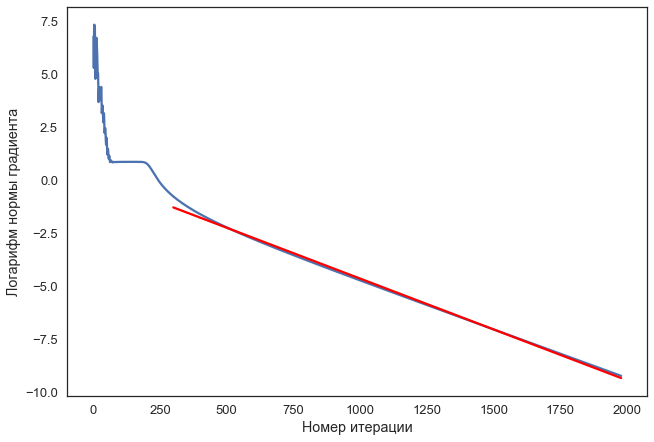

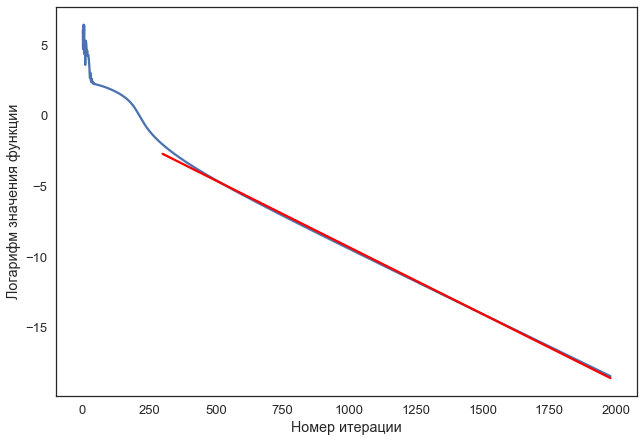

предельная точка: [0.99999967 0.99999933 0.99999867 0.99999732 0.99999464 0.99998925
 0.99997844 0.99995677 0.99991332 0.99982621]
количество итераций: 1978
логарифм знаменателя прогрессии для градиентов: -0.0047962083018835205
логарифм знаменателя прогрессии для значения функций: -0.009444157919810257
знаменатель прогрессии для градиентов: 0.9952152751388273
знаменатель прогрессии для градиентов: 0.9906002980796973


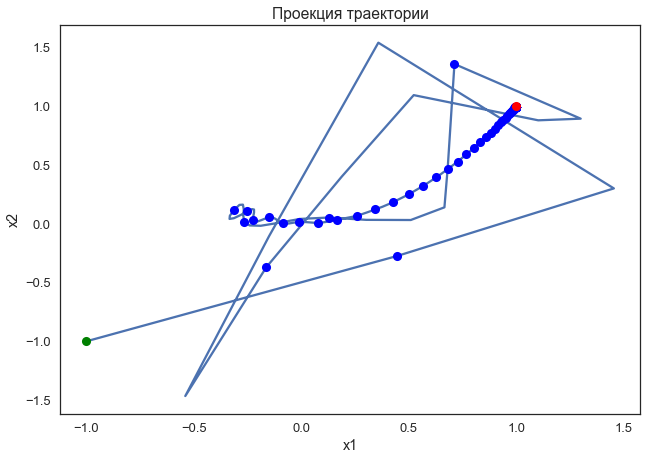

In [62]:
get_graph(x, m, grads, points,f_values)

In [7]:
x0=[-1,-1,1,1,1,1,1,1,1,1]
beta = 0.8
N = 500
new_points = []
new_grads = []

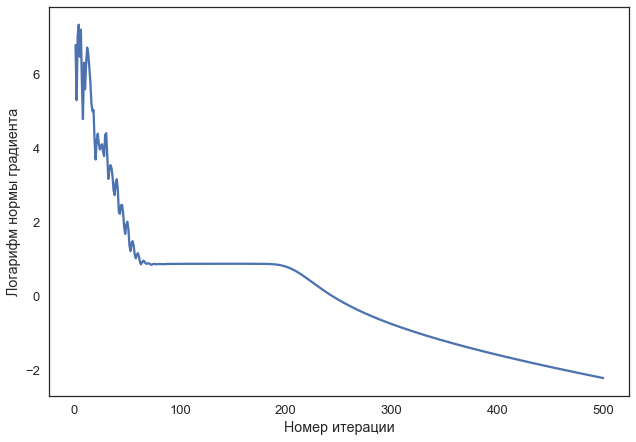

предельная точка: [0.99965028 0.99929946 0.99859635 0.99718822 0.99437126 0.9887478
 0.97756899 0.95553332 0.91282332 0.83278559]
количество итераций: 500


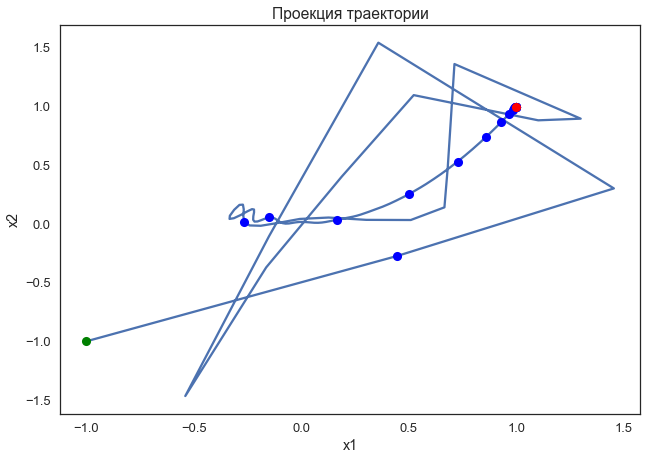

In [8]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0018,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])

for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [9]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.8
N = 500

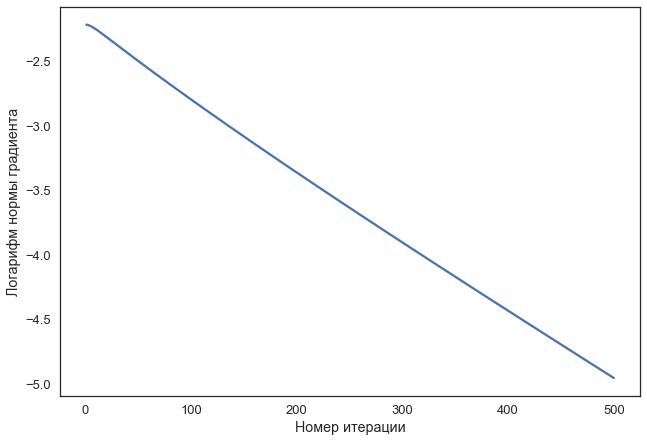

предельная точка: [0.99997668 0.99995328 0.99990635 0.99981224 0.99962359 0.99924545
 0.99848771 0.99697017 0.99393437 0.98787508]
количество итераций: 500


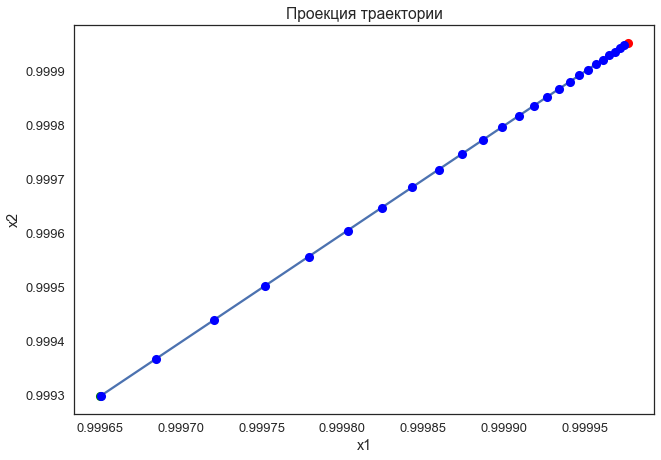

In [10]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.002,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [11]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.8
N = 500

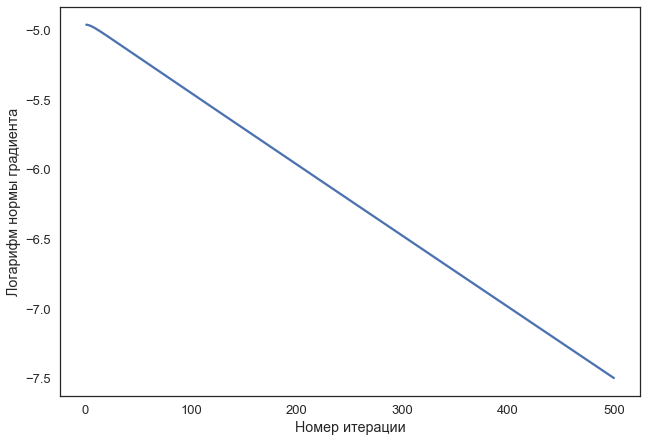

предельная точка: [0.99999817 0.99999633 0.99999264 0.99998524 0.99997041 0.99994067
 0.99988106 0.99976153 0.99952193 0.99904169]
количество итераций: 500


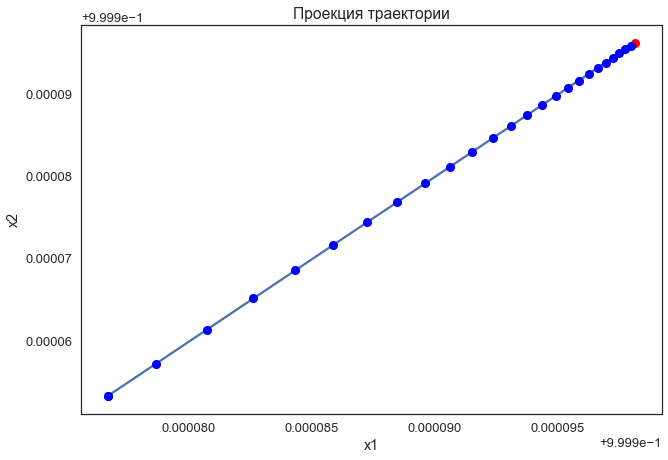

In [12]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.002,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [13]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.8
N = 500

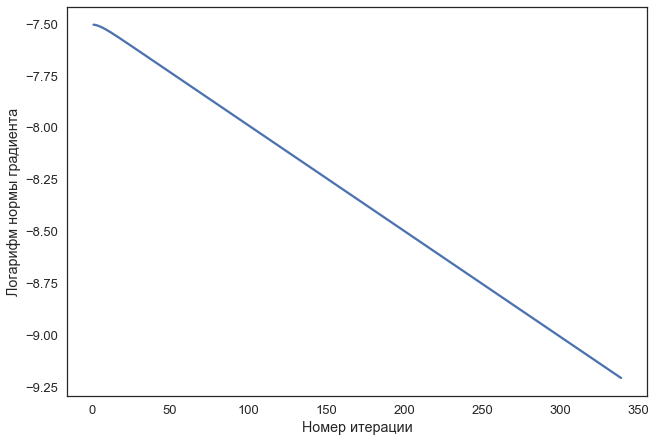

предельная точка: [0.99999967 0.99999933 0.99999866 0.99999732 0.99999462 0.99998922
 0.99997838 0.99995665 0.99991309 0.99982574]
количество итераций: 339


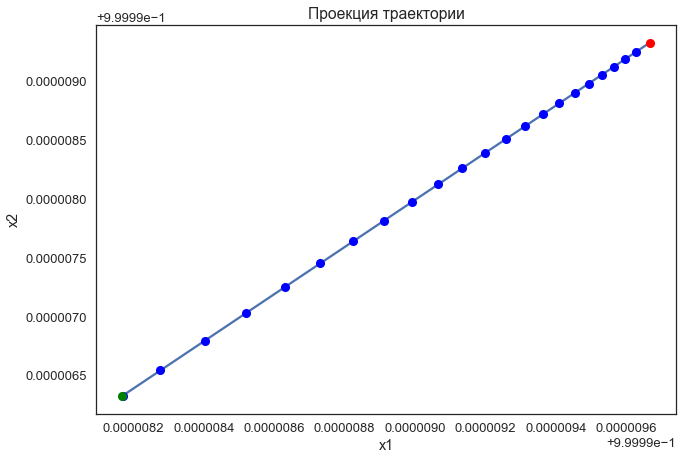

In [14]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.002,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])

for i in range(22):
    plt.plot(points[15*i+1,0], points[15*i+1,1], 'bo')
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [15]:
new_points.append(points)
new_grads.append(grads)

In [16]:
listed=[]
for i in new_points:
    for j in i:
        listed.append(j)
len(listed)
graded = []
for i in new_grads:
    for j in i:
        graded.append(j)

In [17]:
listed = np.array(listed)
new_grads = np.array(graded)

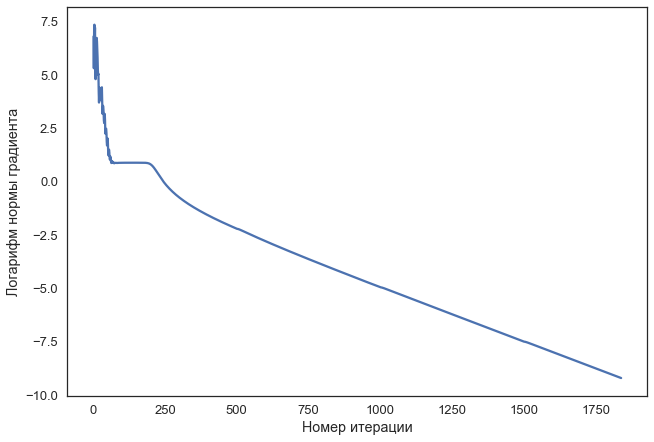

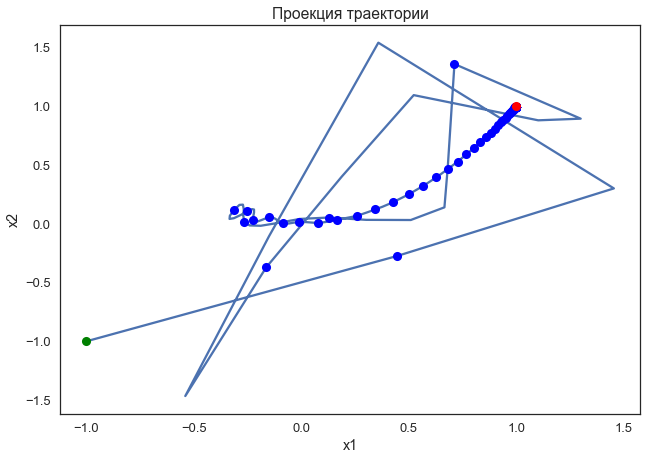

In [18]:
plt.plot(np.linspace(1, 1839, 1839), np.log(np.sqrt(np.sum(np.array(graded)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
plt.plot(listed[:,0], listed[:,1])
for i in range(100):
    plt.plot(listed[i*5+1,0], listed[i*5+1,1], 'bo')
plt.plot(listed[1839,0], listed[1839,1], 'ro')
plt.plot(listed[0,0], listed[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

### Как видно метод с подбором параметров после разбиения по 500 точек дал небольшое ускорение 
1839 вместо 1978 для бета = 0.8


Однако качественное изменение траектории и изменения градиентов достичь не удалось

## beta = 0.9

In [21]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.9
N = 10000

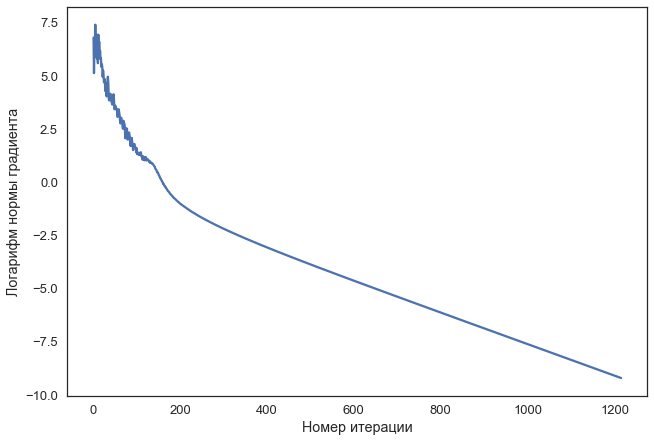

предельная точка: [0.99999967 0.99999933 0.99999866 0.99999732 0.99999462 0.99998921
 0.99997838 0.99995664 0.99991307 0.99982571]
количество итераций: 1215


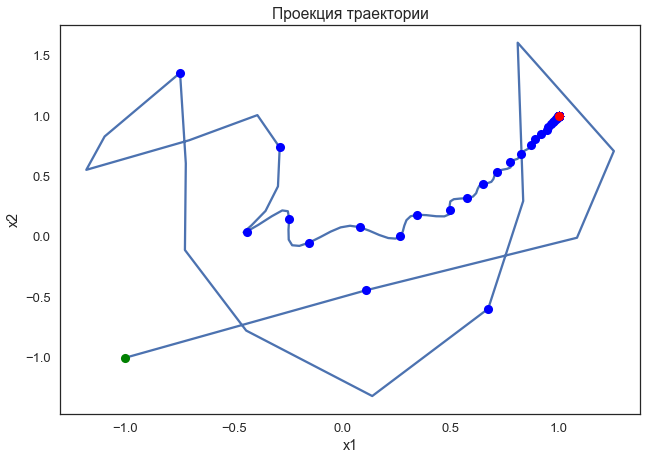

In [22]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00138,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
for i in range(100):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [23]:
x0=[-1,-1,1,1,1,1,1,1,1,1]
beta = 0.9
N = 200
new_points = []
new_grads = []

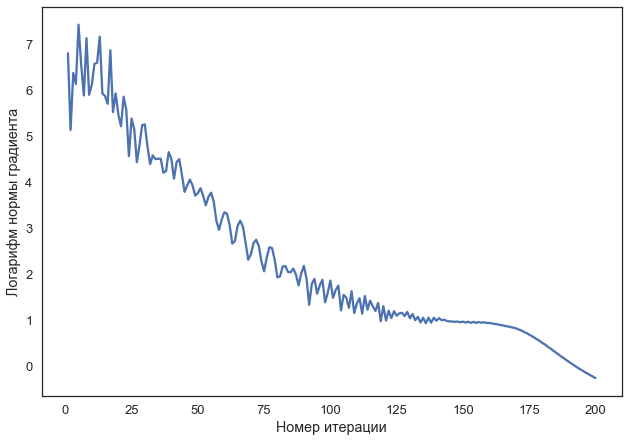

предельная точка: [0.99788435 0.99582652 0.99164721 0.98336396 0.96694641 0.93485132
 0.87373855 0.76293632 0.58099198 0.33466867]
количество итераций: 200


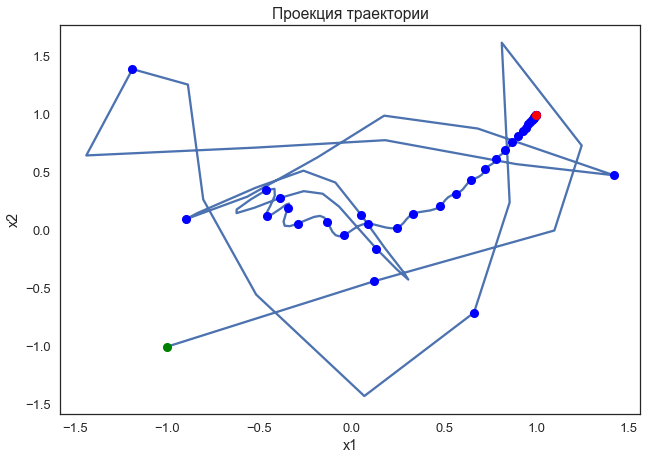

In [24]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00139,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])

for i in range(40):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [25]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.9
N = 200

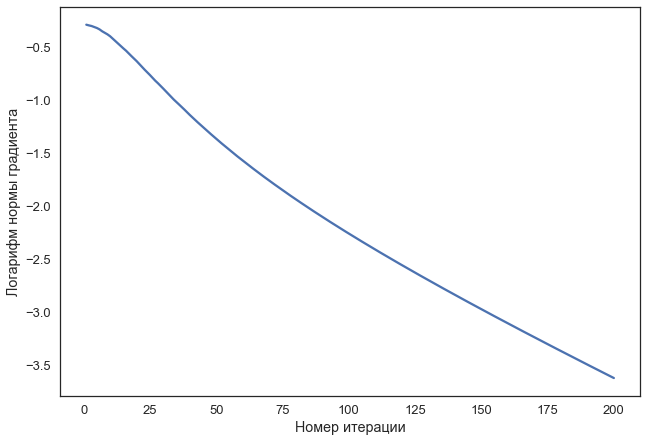

предельная точка: [0.99991319 0.99982607 0.99965137 0.99930116 0.99859936 0.99719378
 0.99438156 0.98876679 0.97760358 0.95559506]
количество итераций: 200


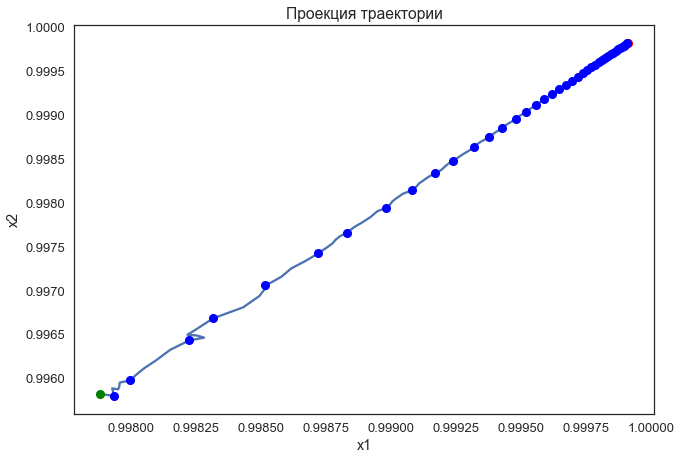

In [26]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0021,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(40):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [27]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.9
N = 200

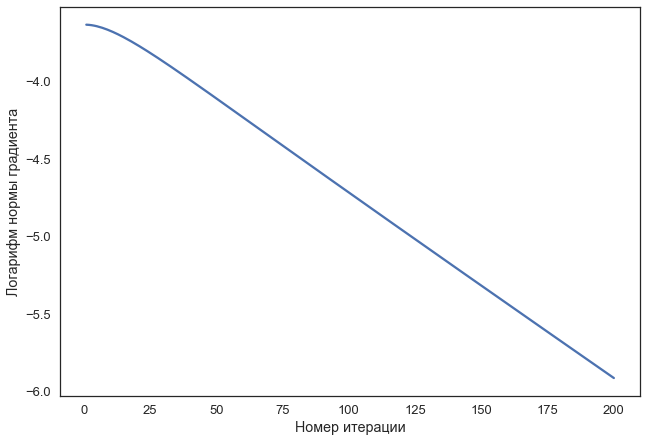

предельная точка: [0.99999112 0.9999822  0.99996432 0.99992847 0.9998566  0.9997125
 0.99942365 0.99884475 0.99768506 0.99536389]
количество итераций: 200


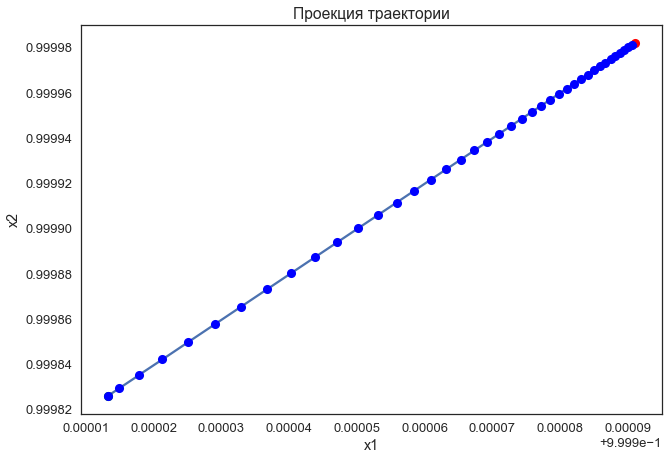

In [28]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0021,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(40):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [29]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.9
N = 200

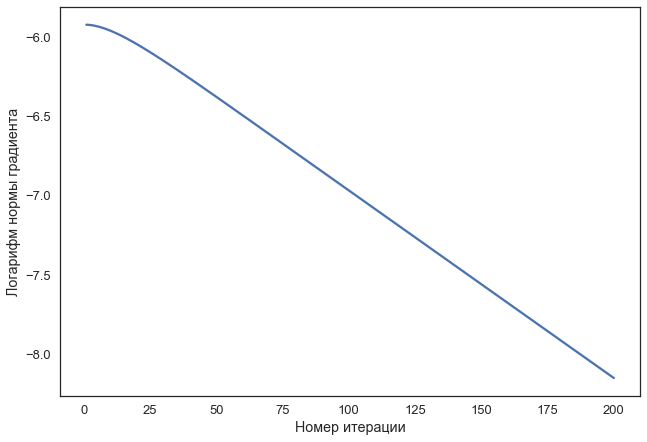

предельная точка: [0.99999905 0.9999981  0.99999618 0.99999235 0.99998466 0.99996924
 0.99993833 0.99987636 0.99975212 0.99950306]
количество итераций: 200


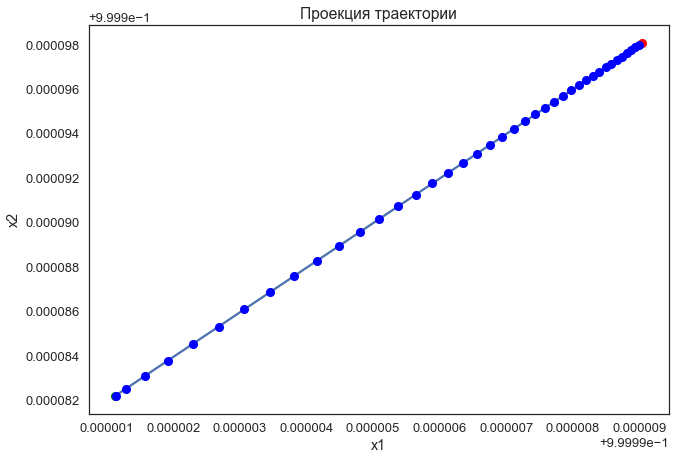

In [30]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0021,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(40):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [31]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.9
N = 200

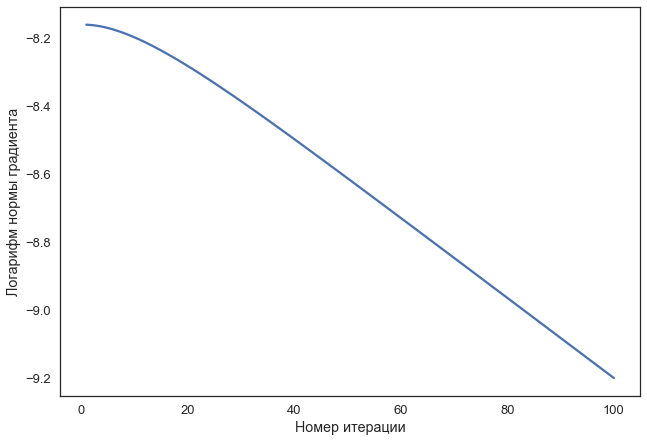

предельная точка: [0.99999966 0.99999933 0.99999865 0.99999729 0.99999457 0.99998912
 0.99997819 0.99995626 0.99991231 0.99982419]
количество итераций: 100


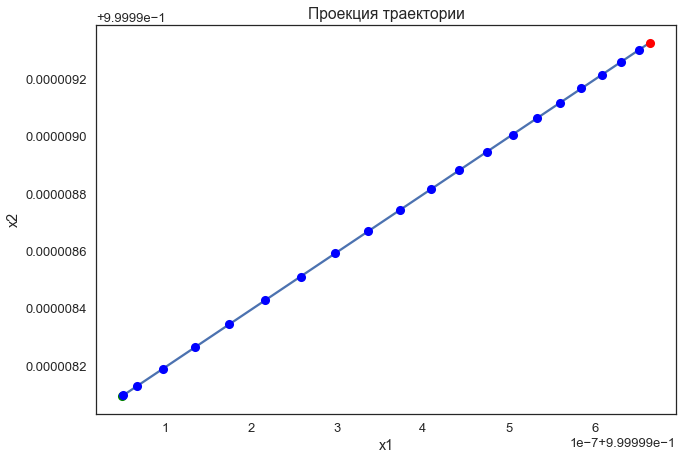

In [32]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0021,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(20):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [33]:
new_points.append(points)
new_grads.append(grads)

In [34]:
listed=[]
for i in new_points:
    for j in i:
        listed.append(j)
len(listed)
graded = []
for i in new_grads:
    for j in i:
        graded.append(j)

In [35]:
listed = np.array(listed)
new_grads = np.array(graded)

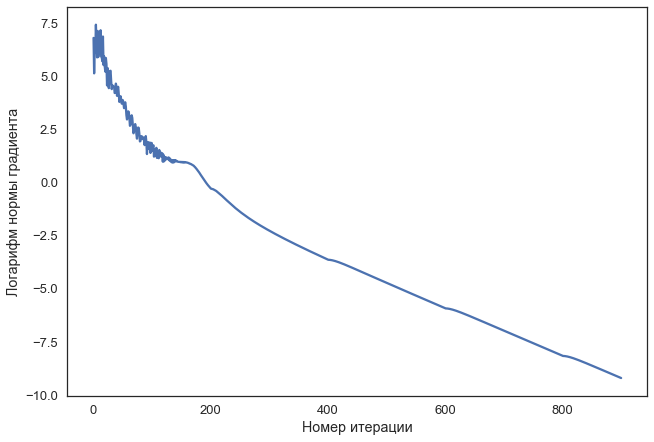

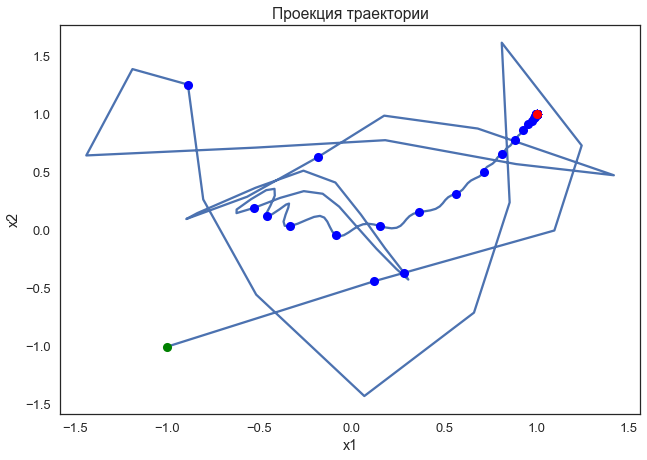

In [36]:
plt.plot(np.linspace(1, 900, 900), np.log(np.sqrt(np.sum(np.array(graded)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
plt.plot(listed[:,0], listed[:,1])
for i in range(100):
    plt.plot(listed[i*9+1,0], listed[i*9+1,1], 'bo')
plt.plot(listed[900,0], listed[900,1], 'ro')
plt.plot(listed[0,0], listed[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

### Как видно метод с подбором параметров после разбиения по 200 точек дал более существенное  ускорение 
900 вместо 1215 для бета = 0.9

Как может быть видно, траектория стала более резкой, но общий рисунок остался тем же 

# beta = 9.5

In [39]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.95
N = 10000

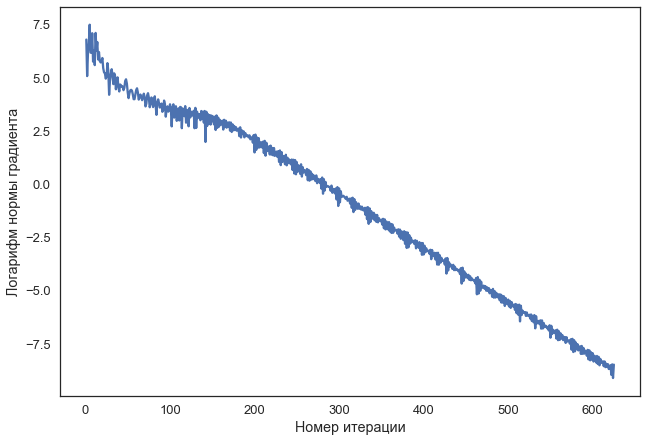

предельная точка: [1.00000016 1.00000033 1.00000073 1.0000016  1.0000033  1.00000632
 1.00001284 1.00002568 1.00005154 1.00010335]
количество итераций: 625


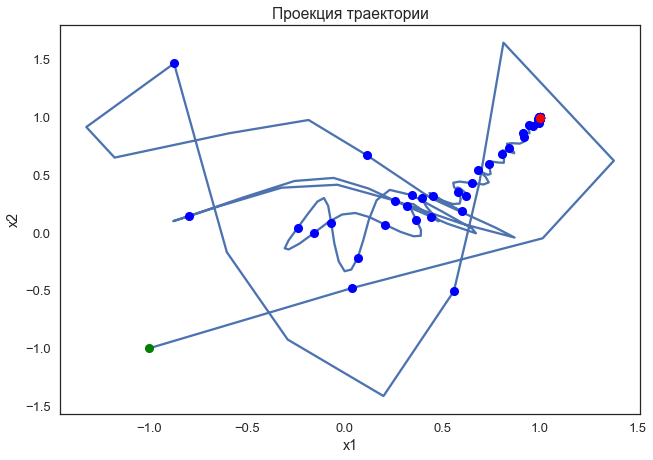

In [40]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00129,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
for i in range(100):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [41]:
x0=[-1,-1,1,1,1,1,1,1,1,1]
beta = 0.95
N = 100
new_points = []
new_grads = []

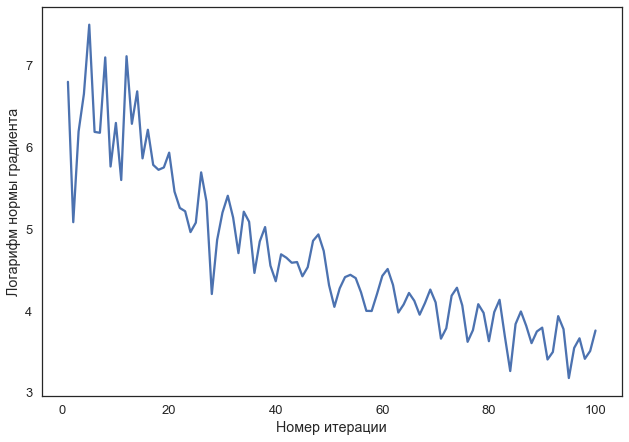

предельная точка: [ 0.59053675  0.44491016  0.19732889  0.07067239 -0.01342538 -0.05439588
 -0.02145777  0.02316268  0.05110065 -0.00910897]
количество итераций: 100


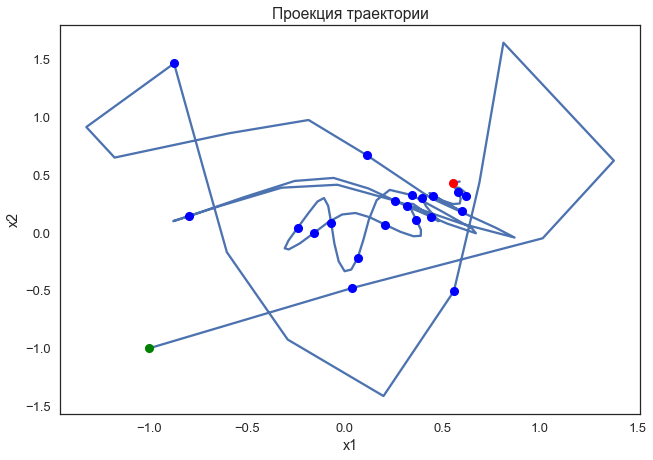

In [42]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00129,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])

for i in range(20):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [43]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.95
N = 100

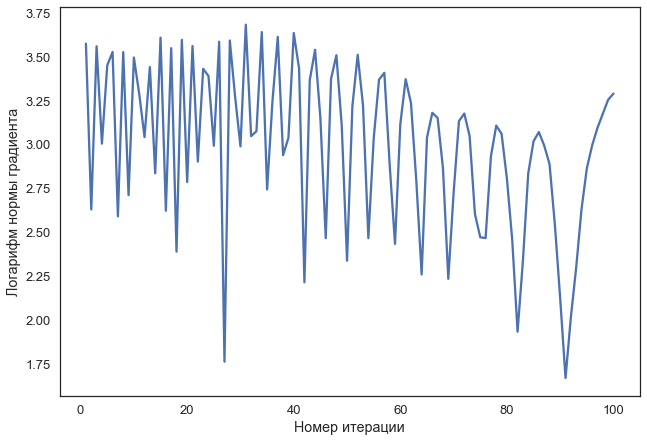

предельная точка: [1.00155891 1.00141738 1.00097047 1.00550358 1.00704635 1.02399469
 1.0371747  1.10161338 1.18325962 1.41731655]
количество итераций: 100


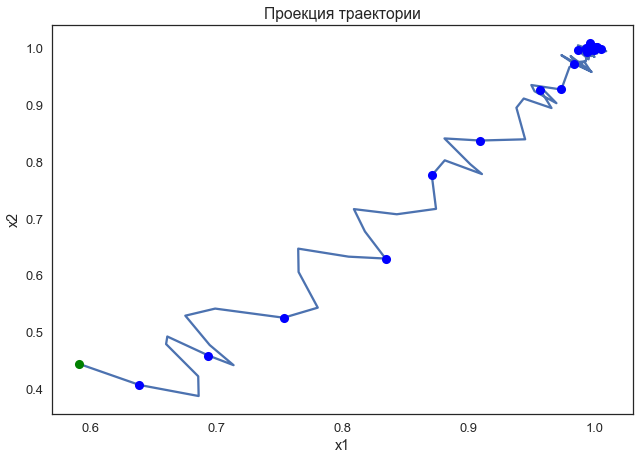

In [44]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00205,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(20):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [45]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.95
N = 100

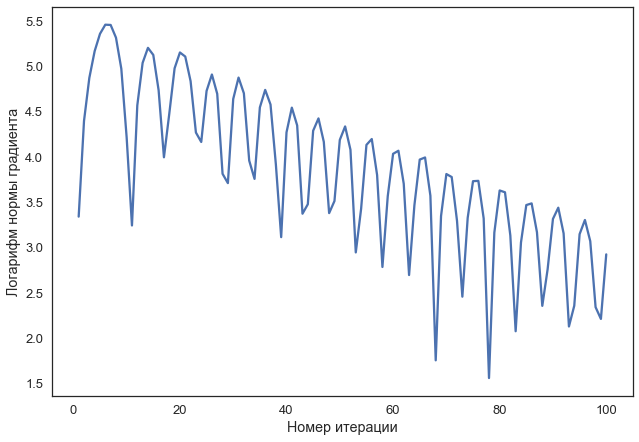

предельная точка: [0.9996448  1.00345529 0.99148772 1.00345991 0.9905132  0.99634788
 0.97341019 0.95528624 0.90609775 0.82185231]
количество итераций: 100


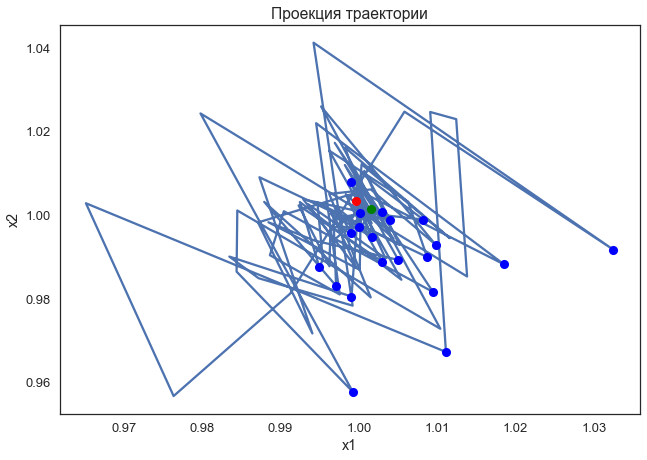

In [46]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00205,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(20):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

Видно, что мы находимся в малой окрестности экстремума и алгоритм не может сойтись из-за большого импульса

Запустим алгоритм с меньшим параметром импульса

In [47]:
x_loc = x

In [48]:
new_points.append(points)
new_grads.append(grads)
x0 = x_loc
N = 100

In [49]:
beta = 0.75

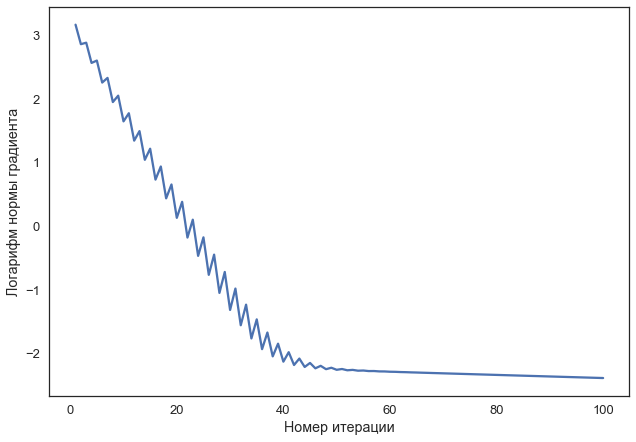

предельная точка: [0.99970397 0.99940699 0.9988117  0.99761932 0.99523308 0.99046633
 0.98097806 0.96222596 0.92569114 0.8565146 ]
количество итераций: 100


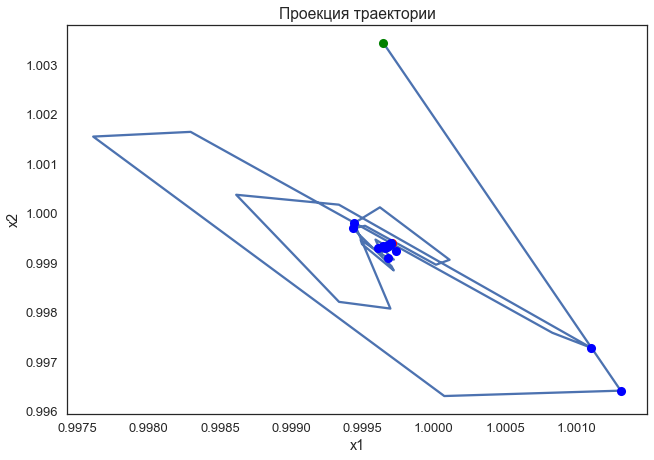

In [50]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.001,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(20):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [51]:
x_loc=x

In [52]:
new_points.append(points)
new_grads.append(grads)
x0 = x_loc
beta = 0.95
N = 100

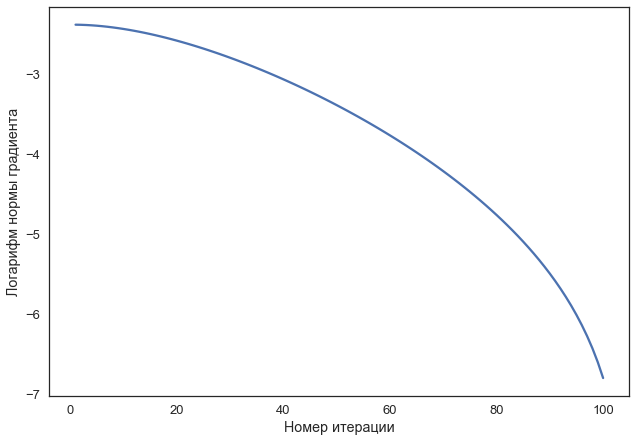

предельная точка: [0.99999706 0.99999411 0.99998818 0.99997631 0.99995249 0.99990475
 0.99980901 0.99961709 0.99923237 0.99846144]
количество итераций: 100


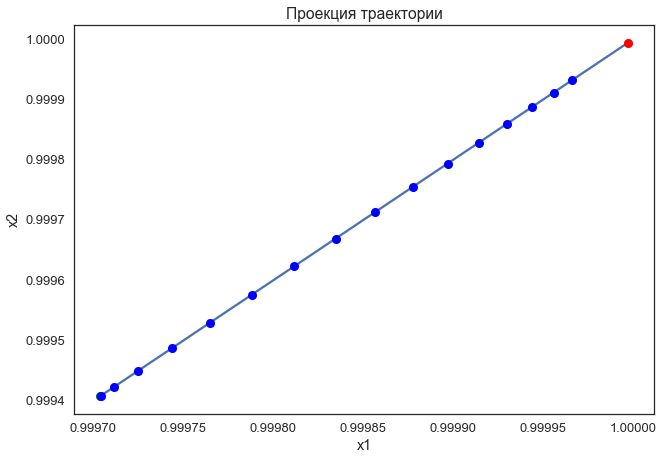

In [53]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0022,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(16):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [54]:
x_loc=x

In [55]:
new_points.append(points)
new_grads.append(grads)
x0 = x_loc
beta = 0.95
N = 100

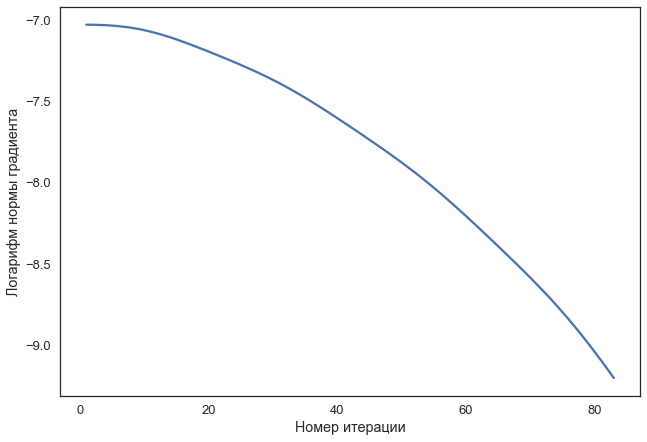

предельная точка: [0.99999967 0.99999933 0.99999866 0.99999731 0.9999946  0.99998917
 0.99997829 0.99995647 0.99991272 0.999825  ]
количество итераций: 83


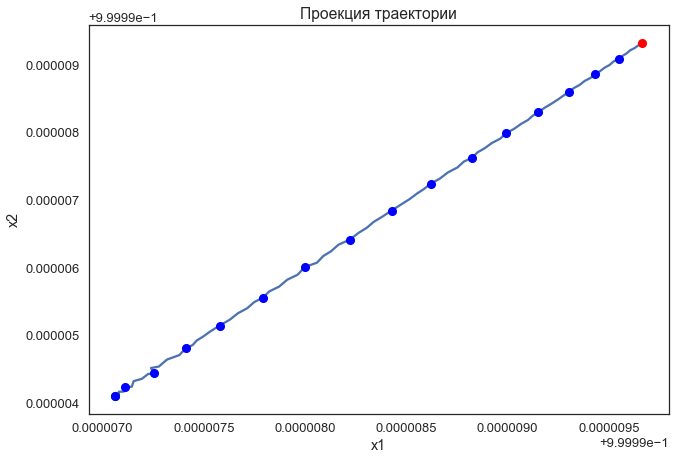

In [56]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0022,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(16):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [57]:
new_points.append(points)
new_grads.append(grads)

listed=[]
for i in new_points:
    for j in i:
        listed.append(j)
len(listed)
graded = []
for i in new_grads:
    for j in i:
        graded.append(j)
listed = np.array(listed)
new_grads = np.array(graded)

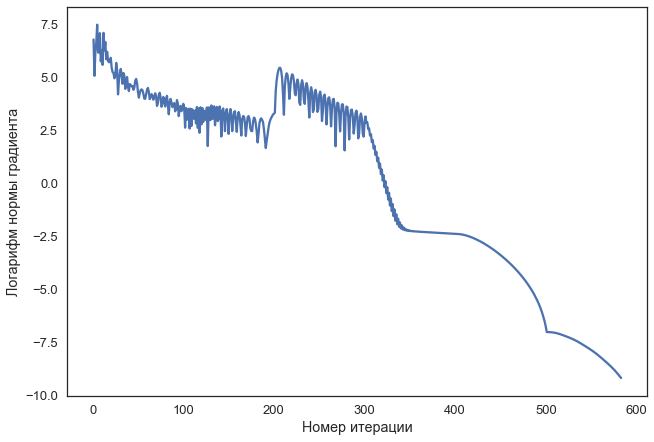

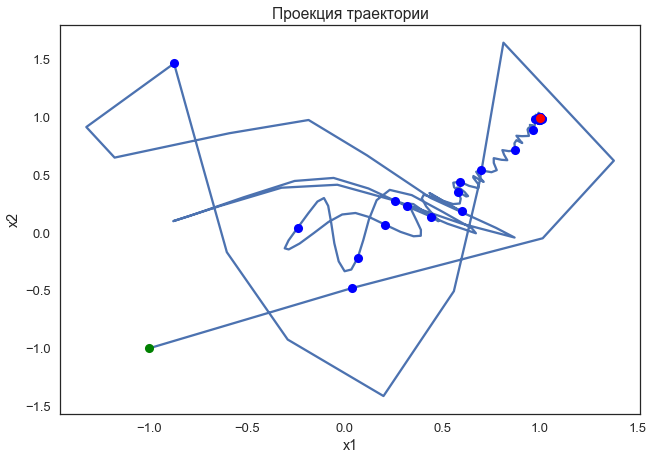

In [58]:
plt.plot(np.linspace(1, 583, 583), np.log(np.sqrt(np.sum(np.array(graded)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
plt.plot(listed[:,0], listed[:,1])
for i in range(58):
    plt.plot(listed[i*10+1,0], listed[i*10+1,1], 'bo')
plt.plot(listed[583,0], listed[583,1], 'ro')
plt.plot(listed[0,0], listed[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

Получили эффект, при котором попадание в окрестность происходит за малое количество итераций, но наблюдаются "колебания" в этой окрестности.